<h1><b>Quantum Computers, Coding, and Applications to Physics - P. Castaño</b></h1>

In this Jupyter Notebook, I will be going over my work for Physics 198: Physcat Decal's final project. I a¡have been working on quantum computing and simulations. In this project, I will go over the basics of quantum computing, briefly explaining the Python Qiskit framework, and I'll make some Qiskit code that simulates some physical phenomena. I am currently working on a research project on theoretical neutrino physics, and I feel like it would be interesting to approach this from a quantum perspective. Therefore, I will go over what I study as a brief introduction to the project later on. Before going into detail, let's look at probabilities, since understanding them will give us a headstart in Qiskit.  

<h2><b>Table of Contents</b></h2>

<h4>Part 1: Quantum Probabilities</h4>

<ul>
  <li>1.1  The Probabilistic Nature of Quantum Computers</li>
  <li>1.2  Truth Table Representations</li>
  <li>1.3  Probabilistic State Representations</li>
  <li>1.4  Two Probabilistic States</li>
</ul>

<h4>Part 2: Quantum Programming</h4>

<ul>
  <li>2.1  Qiskit Basics and One-Qubit Quantum Circuits</li>
  <li>2.2  Multiple-Qubit Quantum Circuits</li>
  <li>2.3  Other Quantum Operators: The Hadamard Gate</li>
  <li>2.4  Quantum States and Their Representations: The Bloch Sphere</li>
  <li>2.5  Quantum States and Their Representations: Rotations</li>
  <li>2.6  Two Qubit Systems and Bit Flipping</li>
</ul>

<h4>Part 3: Neutrinos and Neutrino Oscillations</h4>

<ul>
  <li>3.1  What are neutrinos?</li>
  <li>3.2  Masses, Flavors, and Oscillations</li>
  <li>3.3  Modelling Oscillations on Qiskit (The PMNS Fitting)</li>
  <li>3.4  Modelling Oscillations on Qiskit (The Rotations)</li>
  <li>3.5  Modelling Oscillations on Qiskit (The Results)</li>
</ul>


<h2><b>Part 1: Quantum Probabilities</b></h2>

<b>1.1  The Probabilistic Nature of Quantum Computers</b><br>

To understand Quantum Behaviors and how we can simulate them on a classical computer, which is what I will ultimately be doing in this project, it is important to visualize probabilities and randomness. To help with this, let's look at a coin with two sides that's being flipped over and over. Some characteristics the coin has are:<br>
<ul>
  <li>Our coin has two sides: Heads and Tails</li>
  <li>When we flip the coin, we can only get two different outcomes: Heads or Tails. To represent each result and to clearly distinguish them, we denote Heads with a 0 and Tails with a 1.</li>
</ul>
Observe that if our coin is fair, we expect to get Heads 50% of the time and Tails the remaining 50%, from basic probability. Therefore, the probabilities of getting a Head and a Tail are both equal to 0.5. Using randomness in Python, we can simulate this coin flipping, as shown below.

In [4]:
from random import randrange

for i in [100,1000,10000,100000]:
    heads = tails = 0
    for j in range(i):
        if randrange(2) == 0: heads = heads + 1
        else: tails = tails + 1
    print("experiment:",i)
    print("the ratio of #heads/#tails is",(heads/tails),"heads =",heads,"tails = ",tails)
    print()


experiment: 100
the ratio of #heads/#tails is 0.9230769230769231 heads = 48 tails =  52

experiment: 1000
the ratio of #heads/#tails is 0.937984496124031 heads = 484 tails =  516

experiment: 10000
the ratio of #heads/#tails is 0.9908421262193908 heads = 4977 tails =  5023

experiment: 100000
the ratio of #heads/#tails is 1.000640204865557 heads = 50016 tails =  49984



In the code above, we see that the more coin flips we do, the closer the heads to tails ratio is to 1. In fact, in a purely theoretical scenario where we can flip infinitely many coins under the same conditions, we expect to this ratio to be exactly 1. This is why we say that the probability of getting heads and the probability of getting tails are both equal to 0.5. Now, it might be interesting to look at a biased coin. That is, a coin that doesn't flip as often to one side as it does to the other. Physically, this is achievable, but it's much more useful to consider this a pure thought experiment. The code for this simulation is similar as that above, but with an extra if statement, it's shown below. 

In [5]:
for i in [100,1000,10000,100000]:
    heads = tails = 0
    for j in range(i):
        if randrange(100) <60: heads = heads + 1
        else: tails = tails + 1
    print("experiment:",i)        
    print("the ratio of #heads/#tails is",(heads/tails),"heads =",heads,"tails = ",tails)
    print()

experiment: 100
the ratio of #heads/#tails is 1.9411764705882353 heads = 66 tails =  34

experiment: 1000
the ratio of #heads/#tails is 1.5316455696202531 heads = 605 tails =  395

experiment: 10000
the ratio of #heads/#tails is 1.4813895781637718 heads = 5970 tails =  4030

experiment: 100000
the ratio of #heads/#tails is 1.4866343404202411 heads = 59785 tails =  40215



Here, we see that the ratio is different to the one before, and this is completely understandable. What really shows the difference though, is the number of heads and tails as we increase the number of flips. In the 100000 case, we have approximately 40000 tails and 60000 heads, hinting us that the coin gives heads 60% of the time and tails the remaining 40%, so the coin is effectively biased. Note that how biased the coin is depends on the values we put in the if statement in the code. 

<b>1.2  Truth Table Representations</b><br>

Now, we know that phenomena can be described in terms of how often they happen relative to how many trials we do. Using the fact that Heads are represented by 0 and Tails by 1, we can write truth tables for our phenomena. For example, the fair coin we described before had a 0.5 probability of landing on Heads and of landing on Tails. Therefore, we can represent it with the table below:<br>

<center>
$
\begin{array}{c|cc} & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & 0.5 & 0.5\\  \mathbf{1} & 0.5 & 0.5 \end{array}
$
</center>
This table tells us that if we start with a 0 state (Heads) and flip the coin, we have 0.5 probability of landing on Heads and 0.5 probability of landing on Tails. The initial state is shown to the left of the truth table, while the outputs and their respective probabilities are the columns. To make this clear, here is the truth table for the biased coin from 1.1, where we had a 0.6 probability of landing Heads and a 0.4 probability of landing on Tails.<br>

<center>
$
\begin{array}{c|cc} & \mathbf{0} & \mathbf{1} \\ \hline \mathbf{0} & 0.6 & 0.6\\  \mathbf{1} & 0.4 & 0.4 \end{array}
$
</center>

<b>1.3  Probabilistic State Representations</b><br>

For any coin in general, regardless its bias, we have two different outcomes: Heads (0) and Tails (1). Instead of drawing truth tables for every conceivable process, since this proves to be extremely tedious and unnecessary, we can use a column of size 2 to hold the probabilities of getting Head and getting Tail. In the top spot of this 2x1 vector, we write the probability of getting Heads (0), and in the bottom, we write that of getting Tails (1). For the fair coin we have been discussing all along, the probabilities are represented by ${(0.5, 0.5)} $. For the previous biased coin, it is ${(0.6, 0.4)} $. Again, the first entry shows the probability of getting Heads, and the second entry shows the probability of getting Tails. Now, let's look at a more advanced example of representing probabilities as States:<br> 

If I were to have a 6-sided dice, I'd expect to get each side 1/6th of the times I roll the dice, if I roll it enough times. Therefore, the probabilities to roll each side are all equal. Now, let's say I have a tricked dice: a dice that has different probabilities for its different sides. In fact, the probabilities for each side can be represented as shown below: 

$$ Pr(1):Pr(2):Pr(3):Pr(4):Pr(5):Pr(6) = 6:4:3:2:7:5 . $$

However, this representation isn't too meaningful, so we might want to convert it to a more comprehensible vector form, where the i-th item in the vector is the probability of rolling the i-th side of the tricked dice. The code below does so: 

In [11]:
weights = [6,4,3,2,7,5];
total_weight = 0
for i in range(6):
    total_weight = total_weight + weights[i]
one_weight = 1/total_weight
final_vector = []
for i in range(6):
    final_vector.append(one_weight*weights[i])
print(final_vector)

[0.2222222222222222, 0.14814814814814814, 0.1111111111111111, 0.07407407407407407, 0.25925925925925924, 0.18518518518518517]


<b>1.4  Two Probabilistic States</b><br>
                                        
So far, we have only used setups where we have some options, and the sum of all their probabilities is normalized. However, it is interesting to ask oneself what happens if one knows the probabilistic states for two different systems, and combines them. In other words, if we combine both bits as a single system, then what is the state of the combined system? How do we represent the probabilities in the combined system? Put in a more practical way: what if we have our two coins, a fair and a biased one, and combine them into one system? If we flip both coins, how often do we expect to get two Heads, two Tails, a Head and a Tail and a Tail and a Head? In this section, we will be answering this question.<br>

As mentioned above, we have four possible outcomes in the two coin system. We can name them as follows:
<ul>
  <li>00: both bits are in states 0</li>
  <li>01: the first bit is in state 0 and the second bit is in state 1</li>
  <li>10: the first bit is in state 1 and the second bit is in state 0</li>
  <li>11: both bits are in states 1</li>
</ul>
With basic concepts from linear algebra, we can write linear combinations for each probabilistic state in a two bit system. That is, if we have two coins, the biased and the fair coins, we can write them as combinations of 00, 01, 10, 11. This will enable us to write each individual probabilistic state in a different way. For our two coins, we have Fair Coin = (0.5, 0.5) and Biased Coin = (0.6, 0.4). These are equivalent to saying that Fair Coin is (0.5, 0.5) = 0.5 (1, 0) + 0.5 (0, 1) and Biased Coin is (0.6, 0.4) = 0.6 (1, 0) + 0.4 (0, 1). Now, if we combine both systems into one composite state using the tensor product, as described above, we are left with one state given by: 0.5 (1, 0) + 0.5 (0, 1) \otimes 0.6 (1, 0) + 0.4 (0, 1).

With all this in mind, taking into account that the probabilities of a single state are not linear to the probabilities of a composite state and that probabilities are the ultimate way to describe states, we can now start doing Quantum Programming using Qiskit. 

<h2><b>Part 2: Quantum Programming</b></h2>

<b>2.1  Qiskit Basics and One-Qubit Quantum Circuits</b><br>

For quantum programs, I will be using the probabilistic version of bits (qubits) to design quantum circuits, which will then simulate whichever physical event I prepare them to. This part of the notebook is more code intensive, and I introduce several concepts in the code that will help you structure your thoughts on what Qiskit really does. First of all, Qiskit gets some initial state, such as a probabilistic state that we have talked about, and does some operations that might change the state or not. Then, it measures the state, and sees what the measurement is. By repeating this many times, it is able to come up with a probabilistic state for what's measured, or simply what the probability of measuring something is. To do this, Qiskit provides the user a broad range of hardware, quantum circuits, and quantum algorithms, which I will go into detail in later on. 

Now, it's important to say that quantum programs can only simulate reversible classical programs. That is, if we have a classical program such as a NOT gate, we can infer what the inputs to that gate were just by looking at the outputs. Therefore, a NOT gate is reversible, so we can simulate it quantumly using Qiskit. To simulate something or carry out any process with quantum behavior on a classical computer using the Qiskit Library, we need to operate through Quantum Circuits. The prototypical Quantum Circuit is shown below:

In [12]:
# A quantum circuit is composed by quantum and classical bits in Qiskit. By operating on these bits, we simulate
#quantum behaviors on the classical bits. Here are the objects that we use to create a quantum circuit in qiskit:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# We use a quantum register to keep our quantum bits, a single quantum bit (qubit) in this example.
q =  QuantumRegister(1,"qreg")

# To retrieve an information from a quantum bit, it must be measured. I think of this as a quantum system: when it's 
#measured, we obtain information about it. Perhaps not all the information we can, but certainly some. The measurement 
#result is stored classically. Therefore, we also use a classical regiser with classical bits to keep this storage.
c = ClassicalRegister(1,"creg") 

# Now we can define our quantum circuit. It is composed by a quantum and a classical registers, since both are needed 
#to keep track of the measurements, the truly valuable information.
qc = QuantumCircuit(q,c)

#Now, we have a well-defined circuit, with a classical and a quantum component. We apply operators on the qubits. In
#other words, we do tricks and operations on them. I will describe these different operations later. These operators
#are called gates. In this case, we apply a NOT operator represented as "x" in qiskit. Operator is a part of the 
#circuit, and we should specify the quantum bit as its parameter. All quantum circuits start with qubit 0. 
qc.x(q[0])
# NOT operator or x-gate is applied to the first qubit of the quantum register

# Measurement is defined by assigning a quantum bit to a classical bit
qc.measure(q[0],c[0])
#After the measurement, the observed value of the quantum bit is stored in the classical bit, as previously explained.

#Our cicuit is defined and set up. 
print("The design of the circuit is done.")

The design of the circuit is done.


However, this way of creating a circuit (even though quite standard) is not too helpful in understanding. To help fix this, Qiskit has some valuable functionalities such as drawing the circuit, either with Qiskit itself or with Matplotlib. All of these functions are done to the Quantum Circuit (qc), so we just call on them, as shown below:

In [14]:
# in Qiskit, the circuit object has a method called "draw"
# the default drawing method uses ASCII art

# Let's draw our circuit now using the Qiskit default drawing method, which uses ASCII Art. This process might take a bit, or not work first try. Re-execute the cell if it isn't working for you. 
qc.draw()

┌───┐┌─┐
qreg_0: ┤ X ├┤M├
        └───┘└╥┘
creg: 1/══════╩═
              0

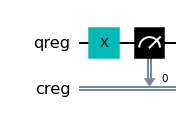

In [15]:
# Using matplotlib, we just specify what type we want the output to be, and it looks a lot nicer!
qc.draw(output='mpl')

As seen in the first diagram, each quantum or classical bit is set to value/state 0 at the beginning. As a convention in quantum computing and quantum mechanics, state 0 is denoted as  |0⟩. This notation is called as ket. Also, each quantum bit is represented as a single straight line, while each classical bit is represented as a double straight line. These are helpful to distinguish between them in many-qubit systems. Since we used a NOT gate, denoted X in the diagram, the state of the quantum bit is expected to be  |1⟩  after the gate has acted upon it, hence the creg: 1/ in the top circuit diagram.

So far, we know what a circuit is and how it is defined/designed, but we don't know how to execute it. The code above only ran it once, but this is of zero utility, since we need many runs to find a pattern in the probabilities. In fact, this is exactly the same reason for why we needed to flip the coin many times in order to see that the probability of getting heads and the probability of getting tails are both 0.5. Let's look at the execution. A quantum program can be executed on a real quantum computer or a local classical simulator or a simulator in the cloud. Here, I'll be using a local classical simulator provided by Qiskit and so the results will be almost accurate. It is important to know that in actual quantum computers, there's still some noise and error, so results will still be partially innacurate. This is important for the application to physics I will have later in the project. To execute the circuit which is already defined, we follow the reasoning and code below:

In [16]:
# we use the method "execute" and the object "Aer" from qiskit library
from qiskit import execute, Aer

# we create a job object for execution of the circuit which depends on three parameters:
# 1. mycircuit
# 2. backend on which it will be executed: we will use local simulator. Qasm is the language in which the machine reads and interprets the code
# 3. how many times it will be executed, by default it is 1024*
#*One would think that the more the better, but I have found that some values happen to be optimal in terms of results!

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary

{'1': 1024}


Interestingly, we found that the output was 1 exactly 1024 times. There's a 100% probability of measuring a 1 final state with a NOT gate circuit. Even more interestingly, I ran this code on the IBM Quantum Computer (free IBM Service to run quantum code, I'll give more details later), and measured 941 '1' values and 110 '0' values. This is extremely strange. In fact, it's comparable to having a coin stuck and fixed on one side to the floor, and measuring the coin to be laying down on its other side 110 out of 1024 times. It's incredible! I will be talking about reasons for this later on, but for now it's important that we acknowledge that quantum computers aren't perfect, they also have errors. 

One last thing I would like to mention in this section is that in the above code, we used "qasm_simulator". "Qasm" stands for Open Quantum Assembly Language, and its function is to make it easier for the classical or quantum computers to interpret our code, which is a sort of hybrid between classical and quantum. A useful piece of code to have in mind when validating code or just understanding it is qc.qasm(), since it shows what the real framework of the code is, or what the computer really sees when you program in Qiskit. It is shown below for our simple one-qubit circuit:

In [17]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qreg[1];
creg creg[1];
x qreg[0];
measure qreg[0] -> creg[0];



<b>2.2  Multiple-Qubit Quantum Circuits</b><br>

In this section, I will extend the knowledge from the previous section to a more complex case with four qubits. There's not many intellectual leaps required, just an extension of the previous case. In fact, we only have to change the dimensions of the classical and quantum registers, and then apply the gates as we wish. In the circuit below, I will apply only NOT gates, but in multiple fashions to the different qubits. Also, we don't really need to define the circuit and later execute it, we can do all of it together, so that's why I import all the necessary tools at once. Lastly, before going on to the code, the barrier we define on the Quantum Circuit acts as a directive for circuit compilation to separate pieces of a circuit so that any optimizations can only happen between barriers. This is helpful for visualizing and looking at the code better. Below is the definition of our new quantum circuit:

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define quantum and classical registers and then quantum circuit
q2 = QuantumRegister(4,"qreg")
c2 = ClassicalRegister(4,"creg")
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first  qubit twice
qc2.x(q2[0])
qc2.x(q2[0])
# apply x-gate to the fourth  qubit once
qc2.x(q2[3])
# apply x-gate to the third  qubit three times
qc2.x(q2[2])
qc2.x(q2[2])
qc2.x(q2[2])
# apply x-gate to the second qubit four times
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])
qc2.x(q2[1])

# define a barrier (for a better visualization)
qc2.barrier()

# if the sizes of quantum and classical registers are the same, we can define measurements with a single line of code
qc2.measure(q2,c2)
# then quantum bits and classical bits are associated with respect to their indices, with same logic as before

# Make sure there's no errors
print("The design of the circuit is done.")

The design of the circuit is done.


Just like before, we can draw the circuit. Before seeing the circuit thought, we expect to have 4 lines for our qubits to live in and 1 thicker line for the classical register to live in. Also, we measure the results in the end. Again, to draw the circuit on Matplotlib, we use the code below: 

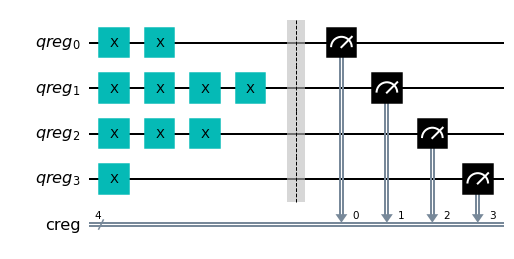

In [19]:
qc2.draw(output='mpl')

As you can see, this circuit is significantly more complicated than the one before, since there's more gates and qubits in action. Now, to execute the circuit, we just repeat the code from before. Since we already imported the Aer and the execute libraries, we can just execute the circuit, as shown below:

In [21]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc2)
print(counts)

{'1100': 1000}


Above, we see that the circuit emitted a binary number! '1100' is the same as 12 in the conventional number system. Therefore, out of 1000 runs, our circuit got 12 all 1000 times. Just for comparison, I ran the same code on the same IBM Quantum Computer as before, and got '0000' 940 times, '0001' 82 times, '0010' 19 times, and '0011' 3 times. This is incredibly different to what we expected, and is indeed another example of the difference between running code on a quantum simulator and an actual quantum computer itself. 

I would also like to clarify on what the '0011' and all these numbers mean. Even though they can be interpreted as binary numbers, and this definitely helps with interpreting the results as actual real results, these numbers represent the combinations of qubits. In section 1.4, when we talked about two probabilistic states (also known as two qubits), we said there's a total of four combinations in which we can arrange these states. Similarly, with 4 qubits, we have 16 ways of arranging them. More generally, for an n qubit system, we have $2^n$ combimations of those qubits. When the quantum code's result is '0011', it means that we got that specific combination, which can be interpreted as combination number 12. 

Having said this, I thought an interesting problem to do would be designing a quantum circuit with 8 qubits, that for each qubit, chooses a random integer out of 1 and 2, and applies an x-gate to it if the output is 2. By doing this several times and repeating the task as much as possible, the results could be interesting. The code, which I just did as practice while learning, is shown below:

In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

q = QuantumRegister(8)
c = ClassicalRegister(8)
qc = QuantumCircuit(q,c)

#Store the index of each qubit to which x-gate is applied
picked_qubits=[] 

for i in range(8):
    if randrange(2) == 0:
        qc.x(q[i]) 
        picked_qubits.append(i)
        
qc.barrier()
qc.measure(q,c)  

#qc.draw(output='mpl')

#Execute the circuit
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)  
print(counts)

{'00001010': 1000}


<b>2.3  Other Quantum Operators: The Hadamard Gate</b><br>

So far, we have only discussed the NOT gate from the perspective of a quantum circuit. In this section, I will talk about the Hadamard Gate without initially explaining what it does, since it is my goal to have you figure it out as we go along. To help you with this, we will look at three different setups, and see how the Hadamard Gate operates on each of them. Then, by looking at truth tables and probabilistic states, I will define precisely what this gate does. The Hadamard Operator is of high relevance to the application to physics at the end of the project, since it is really the first of many other gates that the physics I will be describing relies on. Also, this is the last time we will think of gates and quantum circuits as purely theoretical concepts, since from this section onwards, qubits are not really what we have thought of them as. Having said this, let's look at the first experiment. 

In this first experiment, we will be having one qubit, that can either be 1 or 0 after being measured, on a quantum circuit with one single Hadamard gate acting on it. To do this, we just import the necessary tools, create the circuit, and the registers. Then, qc.h() represents the hadamard gate acting on one of our qubits, qubit 0. Then, we measure and draw the circuit. Our circuit is set up, let's look at the code below:

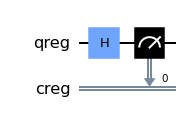

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")
qc = QuantumCircuit(q,c)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])

qc.measure(q,c)
qc.draw(output='mpl')

We can see this is a physically simple circuit, especially in terms of appearance. Now, let's see what the results are when execute it, since this might help us understand the nature of this quantum operator. To help us with visualizing the result, I used a Qiskit tool to visualize data on a histogram. The code and results for the first experiment are shown below:

{'0': 5024, '1': 4976}



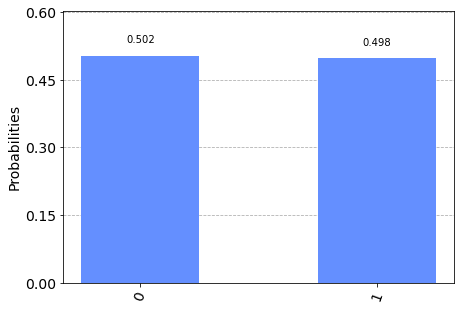

In [29]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes
print()
n_zeros = counts['0']
n_ones = counts['1']
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In previous circuits, we have always obtained a whole bunch of one output. However, with a simple Hadamard circuit, we see that we get '0' half of the time and '1' the other half! So can we just say that Hadamard splits the results into two categories? To make sure, we can run a next experiment. In this second experiment, we will still have one qubit, but we will apply the Hadamard operator twice. Therefore, we would expect for each possible outcome to be halved, and get 4 bins of 0.25 probability each. However, if we set up the circuit and run the code, as shown below, we get different results. Before discussing them, let's make sure we understand the circuit:

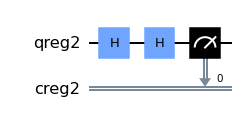

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q2 =  QuantumRegister(1,"qreg2")
c2 = ClassicalRegister(1,"creg2")
qc2 = QuantumCircuit(q2,c2)

# apply h-gate twice on the same qubit
qc2.h(q2[0])
qc2.h(q2[0])

qc2.measure(q2,c2)
qc2.draw(output='mpl')

In [32]:
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2)

{'0': 10000}


Amazingly, we find that we only get '0' values! This is definitely not what we expected. What caused it? Perhaps we can come up with an idea of what's happening here and then see if that idea checks out by applying it to make predictions in the third experiment. The Hadamard gate does something similar to flipping a coin, but this time the final state is not definite until we measure the qubit in the end. That is, the Hadamard gate gets a qubit, say the '0' qubit, and puts it in a superposition of its '0' and '1' states. The Hadamard Gate creates superposition of states, which when measured, become one definite observable state. If you have never learned about quantum mechanics, this might sound crazy to you, so I will also give another perspective at the Hadamard Gate. If we thing of a qubit as a vector, so the '0' state in a one qubit system could be (1,0) while the '1' state in the same system is (1,1), it could make sense that gates or operators are matrices that multiply these vectors to effectively operate on them. In fact this is the definition of an operator! Even though I will go into a lot more detail on this later on, I'll introduce you to the matrix representation of the Hadamard Gate now. The Hadamard gate can be written as a 2x2 matrix, as shown below. 
$$
    H = \frac{1}{\sqrt{2}}[(1,1), (1, -1)]
$$
The reason for why this particular matrix will be explained later, but for now, let's say that when we multiply a quantum state such as (1, 0) or the '0' state by this matrix, we obtain $\frac{1}{\sqrt{2}}[1,1]$, which is a new quantum state. In fact, when we find the probability to measure this state by taking its square, we find that the probability of measuring '0' in a one qubit circuit with one Hadamard Gate is exactly $\frac{1}{2}$, which matches what we observed in experiment 1. Now, if we multiply the '0' state by the Hadamard matrix twice, as we did in experiment 2, we find this state: $[1,0] \times \frac{1}{\sqrt{2}}[(1,1), (1, -1)] \times \frac{1}{\sqrt{2}}[(1,1), (1, -1)] = 1 [1,0]$, so the probability of measuring 0 is exactly 1, which is what we found. Now, let's do one last experiment to test this. 

In this last experiment, we will look at a circuit with both a NOT gate and a Hadamard Gate, in that order. If we start with a '0' state, the NOT gate will flip its value to a '1', and then the Hadamard Gate will be multiplying the Hadamard matrix by the '1' state, represented by the $[0,1]$ vector. We expect to get '1' half of the times we measure and '0' the other times, since this is equivalent to experiment 1 but with a different starting state. Let's see the code:

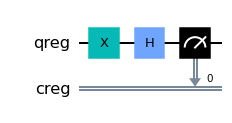

In [33]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")
qc = QuantumCircuit(q,c)

qc.x(q[0])# apply x-gate to the first qubit
qc.h(q[0])# apply h-gate to the first qubit
qc.measure(q,c)
qc.draw(output='mpl')

In [34]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts)

{'0': 5021, '1': 4979}


Indeed, we get '0' half of the times and '1' the other half. Now, what would happen if we apply a NOT gate and two consecutive Hadamard Gates? Would it be the same outcome as experiment 2? Ususally, I like to think about what the outcome is going to be before running the code, but I think it's best to go straight to the code here, to gain some more intuition with it:

In [36]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q2 =  QuantumRegister(1,"qreg2")
c2 = ClassicalRegister(1,"creg2")
qc2 = QuantumCircuit(q2,c2)

qc2.x(q2[0])
qc2.h(q2[0])
qc2.h(q2[0])

qc2.measure(q2,c2)
qc2.draw(output='mpl')

job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2)

{'1': 10000}


Now, since we started with a '1' state before the Hadamard Gates due to the nature of the NOT gate, we totally expected the Hadamard Gates to do this, since it's analogous to experiment 2. By now, I hope you have gained some intuition about the Hadamard Gate, and perhaps about how these operators can be reduced to matrices. Just like quantum mechanics, quantum computing is very closely related to linear algebra. In the next section, we will be discussing more ways of visualizing all these operations we do on qubits, and how the different ways are more convenient in some situations than others. 

<b>2.4  Quantum States and Their Representations: The Bloch Sphere</b><br>

So far, we have seen that quantum states can be represented by vectors, and quantum operators by matrices. Therefore, applying a quantum operator is no more than a linear matrix equation. But how do we interpret geometrically all of this? For someone who understands linear algebra, vectors and matrices might be enough to visualize what is happening in a quantum circuit, but in this section I plan to introduce you to geometric representations and operations that can be done on qubits, such as rotations. This section is extremely important for my application to physics, and I will introduce a new Python Library that helps visualize qubits better. Let's get started. 

If you think about it, all quantum states that we have been dealing with (and in fact all quantum states in general) are unit normalized. That is, the probability to measure a quantum state is always 1, and the different components of the quantum state contribute differently to this. Therefore, we can represent them on the unit sphere, where each quantum state is an arrow in the sphere. To represent this with plots, I will use the Qutip Python library, a library that has many tools, such as 3D plotting of qubits. The code below imports the library, and makes a sphere with it. 

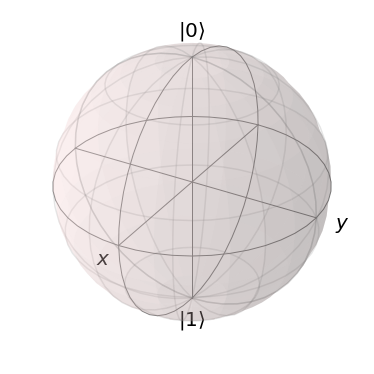

In [38]:
import qutip
b = qutip.Bloch()
b.make_sphere()

This empty sphere above is known as the Bloch Sphere. It is extremely helpful in visualizing quantum states and operations, so I'll explain a bit more about what it does. As you can see, the QuTip plot already has a '0' state and a '1' state on the top and bottom, respectively. Therefore, a qubit representing the '1' state will be a vector pointing straight down, and similarly, the '0' state is an arrow pointing up. Since the Bloch Sphere is a unit sphere, these arrows are all unit length. The code to draw these arrows on the sphere using QuTip is shown below, in the two following cells: 

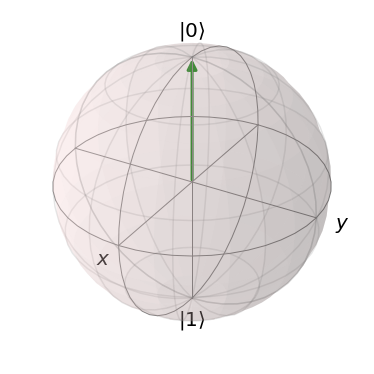

In [44]:
b.clear() #clears what was done on the b sphere before
b.fig.clf()
vec = [0, 0, 1] #this draws the '0' state
b.add_vectors(vec)
b.render()

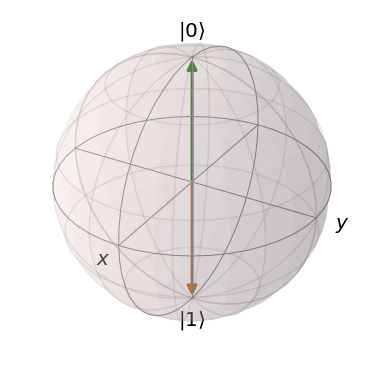

In [45]:
b.fig.clf()
vec = [0, 0, -1] #this draws the '1' state
b.add_vectors(vec)
b.render()

We see that we have a green arrow representing the '0' state and an orange one representing the '1' state. As we would expect, the arrows point up and down on the Bloch Sphere. Any intermediate arrow is a superposition of these two states. Therefore, it seems sensible to say that when we operate on a qubit that's on the Bloch Sphere, we can represent this by somehow changing the direction of the arrow. Now, without going into much detail, it turns out that every quantum gate can be represented as a linear combination of four matrices. This, in turn, means that we can write some special matrices (unitary rotation matrices) denoted U that rotate our qubit as time passes. We therefore have a time evolution, and the qubit rotates differently at different times under the influence of this U gate. It turns out that the Hadamard gate is a valid example of a U gate (since it is a linear combination of four special matrices), so we can in fact see how it affects a qubit as time goes on. Now that we know that we can represent qubits and operations on the Bloch Sphere, we can look at rotations on the Bloch Sphere.

<b>2.5  Quantum States and Their Representations: Rotations</b><br>

As we have discussed, operations are rotations on the Bloch Sphere, but what exactly is a rotation? In linear algebra, we are told that a rotation is a matrix, which changes the metric of space around a vector and in this new version, the vector apears to be rotated relative to the previous metric it was in. This matrix, the matrix of a coordinate mapping, is given to us to be: 

$$ R(θ) = [(cos(θ), -sin(θ)), (sin(θ), cos(θ)]$$

where $x$ is the angle of rotation (in counter-clockwise direction). However, there is a more (perhaps) abstract way to think of rotations. Let's say we live in 3D space, like inside the Bloch Sphere, and we visualize in our head what a rotation is. To rotate by some angle, we have to first rotate in the x direction, then in the y direction, and then in the z direction, even though the order is arbitrary. Therefore, rotations are made of several rotatuins about different axes, so perhaps we can represent this with three different matrices. These are the Pauli matrices, and they are extremely important in quantum computing. These matrices define three operators, X, Y and Z, that give rise to the Pauli Rotations, shown below. Later, in my application to physics, these are important to understand gate decomposition. 

$$
R_x(θ) ≡ exp(\frac{-iθX}{2})\,\,\,\text{,}\,\,\,R_y(θ) ≡ exp(\frac{-iθY}{2})\,\,\,\text{and}\,\,\,R_z(θ) ≡ exp(\frac{-iθZ}{2})
$$

Using the Qutip library, we can plot points representing the tip of the qubit's vector after it has been rotated. Since the Bloch Sphere has clear x, y, and z axes, I drew some sets of points that correspond to rotations about each axis. It turns out that geometrically, we can combine rotations through different axis to get anywhere on the sphere. In other words, any rotation of a qubit is a linear combination of the Pauli rotations. Below, you can see the rotations about x, y, and z in different colors with Qutip.

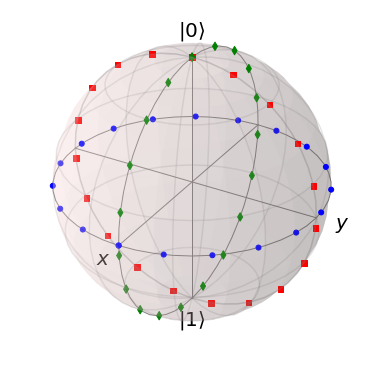

In [65]:
import numpy as np

b.clear()
xp = [np.cos(th) for th in np.linspace(0, 2*np.pi, 20)]
yp = [np.sin(th) for th in np.linspace(0, 2*np.pi, 20)]
zp = np.zeros(20)

pnts = [xp, yp, zp]
b.add_points(pnts)

xz = np.zeros(20)
yz = [np.sin(th) for th in np.linspace(0, 2*np.pi, 20)]
zz = [np.cos(th) for th in np.linspace(0, 2*np.pi, 20)]

b.add_points([xz, yz, zz])

xy = [np.sin(th) for th in np.linspace(0, 2*np.pi, 20)]
yy = np.zeros(20)
zy = [np.cos(th) for th in np.linspace(0, 2*np.pi, 20)]

b.add_points([xy, yy, zy])
b.show()

As you can see, rotations change the qubits. If we start off with a '0' qubit, a rotation might get it to a superposition of two states. This is important to understand that rotations are intrinsically quantum when on a Bloch Sphere, and that's why they are so useful. Later, we will see that some special rotation operators have special properties that allow physicists to model quantum behaviors. Rotations are awesome!

<b>2.6  Two Qubit Systems and Bit Flipping</b><br>

In section 2.2, we looked at quantum circuits with multiple gates and multiple qubits. However, we approached it with the basic perspective of qubits as simple numbers and operators as truth tables. Now, we will look at two-qubit systems from the perspective of qubits as vectors, operators as matrices, and rotations as truly quantum mechanical tools. When we have two qubits, we can represent them in four different combinations of zeros and ones: '00', '01', '10', and '11'. Since qubits are vectors, we can represent them by the standard basis of R4. Therefore, '00' is (1,0,0,0), and so on. We refer to these vectors as the computational basis of our quantum circuit. Once we have the qubits set up, the next thing we need in order to have a well-defined circuit are quantum gates. However, the NOT and Hadamard gates we explored before were given by 2x2 matrices. From linear algebra, we can't multiply a 2x2 matrix by a 4x1 vector, so something must be done. 

To fix this problem we make use of tensor products, mentioned in section 1.4, to multiply out two equal gates, getting a large gate. For example, if we take the tensor product of two Hadamard gates, we get a 4x4 gate which is logically equivalent to the 2x2 one but can now act on a two qubit system. In terms of Qiskit code, this can be done very simply by creating a two-qubit circuit and applying the Hadamard gate twice, but each time to a different qubit. Then, we can define a quantum circuit, as shown below:

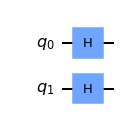

In [66]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)

qc.draw(output='mpl')

Most of the time, Qiskit simulations yield the theoretically correct output, so they basically do linear algebra very quickly. However, quantum computers have errors in them, and this is where the quantum circuits get more interesting. However, before we study these errors, we must understand a new gate or quantum operator: the CNOT gate. For those who have studied classical logic gates, the CNOT might be familiar. However, I'll briefly explain what it is and how it operates. The CNOT, or Controlled NOT gate, if the state of the first qubit is one, then the state of the second qubit is flipped. However, if the state of the first qubit is zero, then the state of the second qubit remains the same. In other words: 
<ul>
    <li>CNOT('00') is '00'</li>
    <li>CNOT('01') is '01'</li>
    <li>CNOT('10') is '11'</li>
    <li>CNOT('11') is '10'</li>
</ul>
As you can see, some qubits are getting flipped. In Qiskit, CNOT operator is represented as cx-gate, and it takes in two arguments: the controller-qubit and the target-qubit. What's happening is that the CNOT operator applies a NOT operator to the target qubit that depends (or is controlled by) the controller qubit. Note that as with any other gate, the CNOT gate can also be represented by a unitary matrix. This time, however, since we are dealing with two-qubit systems, the matrix for the CNOT operator is a 4x4 matrix. To test for the validity of the CNOT gate, the following quantum code takes in a state from the four possible ones and applies a CNOT gate to it, then measures it, and then repeats the default 1024 times, just as we did in Section 2.1. 

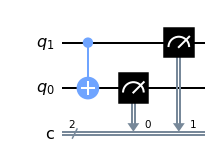

00 --CNOT-> {'00': 1024}


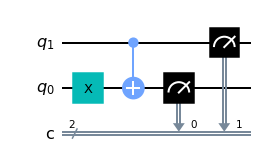

01 --CNOT-> {'01': 1024}


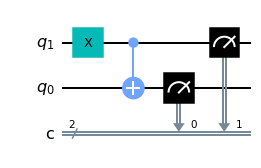

10 --CNOT-> {'11': 1024}


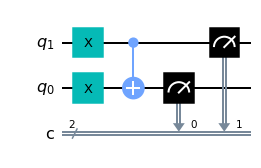

11 --CNOT-> {'10': 1024}


In [67]:
states = ['00','01','10','11']

for i in states:
    from qiskit import QuantumCircuit, execute, Aer
    qc = QuantumCircuit(2,2)
    # initialize the pair
    # we follow the reading order in Qiskit
    if i[1] == '1':
        qc.x(0)
    if i[0] =='1':
        qc.x(1)
    qc.cx(1,0)
    qc.measure(0,0)
    qc.measure(1,1)
    display(qc.draw(output='mpl',reverse_bits=True))
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qc)
    print(i,"--CNOT->",counts)

The Quantum Circuit above really shows visually how the CNOT gate distinguishes between the target qubit and the controller qubit. By now, we have studied two-qubit systems, Hadamard Gates, and of course, CNOT gates. Why not combine them all in one piece of code? In the following circuit, we will have two qubits, apply Hadamard on them, then apply a CNOT gate, then apply Hadamard again on both qubits, and then measure. Also, the initial two qubits will vary with time. Since we have four possible combinations of zeros and ones in a two-qubit system, the intial quibits will reinitialize every time enough measurements have been done for a specific set of qubits. The code is shown below: 

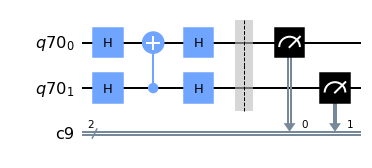

00 is mapped to {'00': 1024}


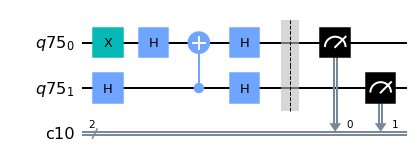

01 is mapped to {'11': 1024}


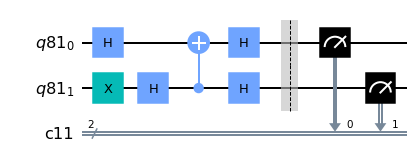

10 is mapped to {'10': 1024}


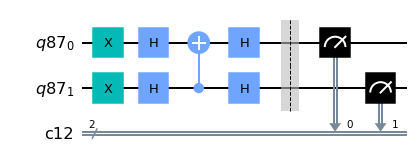

11 is mapped to {'01': 1024}


In [69]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

states=['00','01','10','11']

for i in states:
    q =  QuantumRegister(2)
    c = ClassicalRegister(2) 
    qc = QuantumCircuit(q,c) 
    
    if i[0]=='1':
        qc.x(q[1]) 
    if i[1]=='1':
        qc.x(q[0]) 

    # apply H-gate to both qubits
    qc.h(q[0])
    qc.h(q[1])

    # apply CNOT
    qc.cx(q[1],q[0])

    # apply H-gate to both qubits
    qc.h(q[0])
    qc.h(q[1])

    # measure
    qc.barrier()
    qc.measure(q,c)

    display(qc.draw(output='mpl'))
    
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
    counts = job.result().get_counts(qc)
    print(i,"is mapped to",counts)

As you can see, out of the 1024 runs we did for each initial qubit pair, we got what we expected all the time. This is due to the theoretical framework of Qiskit that I described before. However, if we run this same code on the IBM free access quantum computer that we have been using since the beginning of the notebook, we find completely different results. These are the equivalent results on the IBM computer:
<ul>
    <li>00 is mapped to {'00': 886, '01': 88, '10': 36, '11': 14}</li>
    <li>01 is mapped to {'00': 7, '01': 39, '10': 26, '11': 952}</li>
    <li>10 is mapped to {'00': 19, '01': 8, '10': 993, '11': 4}</li>
    <li>11 is mapped to {'00': 10, '01': 998, '10': 3, '11': 13}</li>
</ul>
We can see that the quantum computer never gets 100% the same results as the classical simulation. This is because of sources of error in the actual quantum computer, such as bit flipping and readout errors. As we saw with the CNOT gate, bits can get flipped easily in a quantum circuit, and sometimes this happens inconsistently due to the probabilistic nature of the quantum gates.

<h2><b>Part 3: Neutrinos and Neutrino Oscillations</b></h2>

By now, we have studied quantum computers and Qiskit in the necessary depth to apply it to a real life physics case I have been studying: neutrinos. In order to understand the application to physics, we must understand some key elements of particle physics that are unrelated to the quantum computing we have been learning, or at least that's what we will think for now. In the upcoming section, I will provide an overview of what neutrinos are, their properties, and some phenomena they are involved in, such as neutrino oscillations. Let's get started. 

<b>3.1  What Are Neutrinos?</b><br>

In modern physics, since the development of general relativity and quantum mechanics in the early 20th century, there have been many significant discoveries in the subatomic realm. These discoveries have led to new particles being discovered, and to a significal theoretical framework for them to fit in to be developed. This framework is known as the Standard Model of Particle Physics, and even though it has its flaws (that we are trying to fix), it is the best we have to the moment, and it's capable of making predictions up to many significant figures. 

The Standard Model (SM) splits the known particles into two main types: fermions, named after Enrico Fermi, which are particles that interact through the universal interactions (Gravity, Weak Nuclear Force, Strong Nuclear Force, Electromagnetism), and bosons, named after Satyendra Nath Bose, which carry the forces. Since the differences and workings of the SM are mathematically intensive, I will limit myself to saying that neutrinos are a group of particles in the fermions. Neutrinos are very small particles, nearly massless, and they interact only through the weak interaction. Neutrinos are incredibly frequent in our universe, but since they only interact through the weak force in very small amounts and since they are so small and travel so fast, it is incredibly hard for humans to detect them. This is why learning things about neutrinos is very complex and demanding, and many detectors are being built all around the globe. 

<b>3.2  Masses, Flavors, and Oscillations</b><br>

As I just mentioned, neutrinos have mass. It's a very small mass, but it's nonzero. However, when physicists where studying neutrinos, they realised that some have properties that others don't. They realised that depending on how the neutrino is created, it has different properties. Since neutrinos originated from the decay of an electron, a muon, or a tauon (other fermions in the SM), they established three neutrino flavors: electron neutrinos, muon neutrinos, and tau neutrinos. Now, this is very interesting, but are flavors something real and tangible? It turns out that similar to quarks' color, the neutrino flavor has a more quantum mechanical meaning to it. In short, a neutrino created with a specific flavor has an associated specific quantum superposition of all three mass states. That is, there is a close bond between neutrino masses, the quantum superposition we have talked about in previous sections, and neutrino flavors. 

In fact, this relationship is characterized by a matrix, called the Pontecorvo–Maki–Nakagawa–Sakata (PMNS) matrix. This matrix is equivalent to an operator that we were discussing, so when we take the mass states of the neutrino and multiply them by the PMNS matrix, we find the flavor states of the neutrino. In fact, we can think of the PMNS as a quantum gate. According to a theorem proven and developed by Farrokh Vatan and Colin Williams, from NASA JPL, every two-qubit quantum gate in SO(4) can be realized by a circuit consisting of 12 elementary one-qubit gates and 2 CNOT gates. Disregarding the technical terminology, this means that any quantum operator that satisfies some group theory requisites can be written in a quantum circuit as 12 elementary quantum gates and 2 CNOT gates. Therefore, the PMNS matrix (which satisfies the requirements) can be written as 12 elementary quantum gates and 2 CNOT gates. Since we only have 3 neutrino flavors, we can write the PMNS matrix as a rotation from the mass state to the flavor state. WE have: 

$$U_{PMNS} = U_{3A}U_{3B}CNOT_{AB} U_{3A}U_{3B}CNOT_{AB} U_{3A}U_{3B} $$

where U means rotation. This is a first hint that quantum computing might be a useful tool to use when modelling neutrino flavors. However, there is something I haven't yet mentioned that will convince you that quantum computing is perfectly equipped for this. When neutrinos exist in a flavor state, they don't always remain in the same flavor forever. As with the Hadamard gate in section 2.3, the value of the flavor state can change with time. In fact, it has been observed experimentally that neutrinos change flavor as they travel through space. This phenomenon is called neutrino oscillation. Since neutrino oscillations depend entirely on the PMNS matrix, which we know to be quantum mechanical, we can try modelling neutrino oscillations using Qiskit. In the following section, I will be simulating the neutrino oscillations using Qiskit, and then, I will explain some interesting things that appear with the simulation. 

<b>3.3  Modelling Oscillations on Qiskit (The PMNS Fitting)</b><br>

To model oscillations without errors, we will need to fit for some data. The PMNS matrix has some fixed values, but since it is a rotation, it depends on three angles, as we would expect. Therefore, by fitting for these angles, we can find the optimal rotations for our qubits, and the simulation will look as good as possible. The PMNS values that the scientific community agreed on as of June 2020 are below: 

In [70]:
U_PMNS = [[ 0.821327, 0.149719,  0.55046, 0.],
          [ 0.305724, 0.699143,-0.646322, 0.],
          [-0.481617, 0.699131, 0.528452, 0.],
          [0.       , 0.      , 0.      , 1.]]

Now, each item in the PMNS rotation matrix is obtained by some complicated relations between the angles we are trying to optimize. To optimize something, we first need to define that something. In the next code cell, I will define each of the relations between the angles that gives each number in the PMNS Matrix. This will allow me to create a matrix V, which I will then try to fit the parameters/angles for so that it resembles the actual PMNS (shown above) as much as possible. 

In [77]:
import numpy as np
from numpy import sin as Sin
from numpy import cos as Cos
from scipy.optimize import minimize
import random
from tabulate import tabulate

In [78]:
def V11(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(beta/2.)*(Cos(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon + gamma)/2.) - Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.)) + \
           Sin(alpha/2.)*(-(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.)) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.))) + \
           Cos(beta/2.)*(-(Sin(alpha/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon + gamma)/2.) + Cos((epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) + \
           Cos(alpha/2.)*(Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Cos(zeta/2.) + Sin(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V21(alpha, beta, gamma, delta, epsilon, zeta):
    return Cos(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon + gamma)/2.) - Cos((alpha - epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
           Sin(beta/2.)*(-(Sin(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon + gamma)/2.) + Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.))) - \
           Cos(alpha/2.)*(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V31(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(alpha/2.)*(-(Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon - gamma)/2.) + Cos((epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) + \
           Cos(beta/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) - Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.))) + \
           Cos(alpha/2.)*(Cos(delta/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(beta/2.) + Cos(beta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
           Sin(delta/2.)*(-(Cos(beta/2.)*Cos(zeta/2.)*Sin((epsilon - gamma)/2.)) + Sin(beta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))

def V41(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon - gamma)/2.) - Cos((alpha - epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
           Cos(beta/2.)*(Sin(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon - gamma)/2.) + Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
           Cos(alpha/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))

def V12(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Cos(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon + gamma)/2.) + Cos((alpha - epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) + \
           Sin(beta/2.)*(Sin(alpha/2.)*(-(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon + gamma)/2.)) + Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.)) + \
           Cos(alpha/2.)*(-(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.)) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V22(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(beta/2.)*(-(Cos(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon + gamma)/2.) + Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.))) + \
           Sin(alpha/2.)*(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.))) + \
           Cos(beta/2.)*(Sin(alpha/2.)*(-(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon + gamma)/2.)) + Cos((epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
           Cos(alpha/2.)*(Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Cos(zeta/2.) - Sin(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V32(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon - gamma)/2.) + Cos((alpha - epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) + \
           Cos(beta/2.)*(Sin(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon - gamma)/2.) - Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
           Cos(alpha/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) - Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))

def V42(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Sin(alpha/2.)*(Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon - gamma)/2.) - Cos((epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
           Cos(beta/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))) + \
           Cos(alpha/2.)*(Cos(delta/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(beta/2.) + Cos(beta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
           Sin(delta/2.)*(Cos(beta/2.)*Cos(zeta/2.)*Sin((epsilon - gamma)/2.) - Sin(beta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.))) 

def V13(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(alpha/2.)*(Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon + gamma)/2.) + Cos((epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
           Cos(beta/2.)*(-(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.)) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.))) - \
           Cos(alpha/2.)*(Cos(delta/2.)*(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(beta/2.) + Cos(beta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.)) + \
           Sin(delta/2.)*(-(Cos(beta/2.)*Cos(zeta/2.)*Sin((epsilon + gamma)/2.)) + Sin(beta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V23(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon + gamma)/2.) - Cos((alpha - epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) + \
           Cos(beta/2.)*(-(Sin(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon + gamma)/2.) + Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.))) - \
           Cos(alpha/2.)*(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V33(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Sin(beta/2.)*(Cos(alpha/2.)*(-(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon - gamma)/2.)) + Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
            Sin(alpha/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) - Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))) + \
            Cos(beta/2.)*(-(Sin(alpha/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon - gamma)/2.) + Cos((epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) + \
            Cos(alpha/2.)*(Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Cos(zeta/2.) + Sin(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))

def V43(alpha, beta, gamma, delta, epsilon, zeta):
    return Cos(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon - gamma)/2.) - Cos((alpha - epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) - \
            Sin(beta/2.)*(Sin(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon - gamma)/2.) + Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
            Cos(alpha/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))

def V14(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon + gamma)/2.) + Cos((alpha - epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
            Cos(beta/2.)*(Sin(alpha/2.)*(-(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon + gamma)/2.)) + Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.)) +\
            Cos(alpha/2.)*(-(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.)) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V24(alpha, beta, gamma, delta, epsilon, zeta):
    return Sin(alpha/2.)*(Sin(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon + gamma)/2.) - Cos((epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
            Cos(beta/2.)*(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.))) - \
            Cos(alpha/2.)*(Cos(delta/2.)*(Cos((epsilon + gamma)/2.)*Cos(zeta/2.)*Sin(beta/2.) + Cos(beta/2.)*Cos((epsilon - gamma)/2.)*Sin(zeta/2.)) + \
            Sin(delta/2.)*(Cos(beta/2.)*Cos(zeta/2.)*Sin((epsilon + gamma)/2.) - Sin(beta/2.)*Sin((epsilon - gamma)/2.)*Sin(zeta/2.)))

def V34(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Cos(beta/2.)*(Cos(delta/2.)*Cos(zeta/2.)*Sin((alpha + epsilon - gamma)/2.) + Cos((alpha - epsilon - gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.))) - \
            Sin(beta/2.)*(Sin(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon - gamma)/2.) - Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) + \
            Cos(alpha/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) - Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))

def V44(alpha, beta, gamma, delta, epsilon, zeta):
    return -(Sin(beta/2.)*(Cos(alpha/2.)*(Cos(zeta/2.)*Sin(delta/2.)*Sin((epsilon - gamma)/2.) + Cos(delta/2.)*Cos((epsilon + gamma)/2.)*Sin(zeta/2.)) - \
            Sin(alpha/2.)*(Cos((epsilon - gamma)/2.)*Cos(zeta/2.)*Sin(delta/2.) + Cos(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))) + \
            Cos(beta/2.)*(Sin(alpha/2.)*(-(Cos(delta/2.)*Cos(zeta/2.)*Sin((epsilon - gamma)/2.)) + Cos((epsilon + gamma)/2.)*Sin(delta/2.)*Sin(zeta/2.)) + \
            Cos(alpha/2.)*(Cos(delta/2.)*Cos((epsilon - gamma)/2.)*Cos(zeta/2.) - Sin(delta/2.)*Sin((epsilon + gamma)/2.)*Sin(zeta/2.)))


Above are defined all of the rows and columns of a general matrix V, specified below:

In [72]:
def V(params):
    return np.array([
                     [V11(*params), V12(*params), V13(*params), V14(*params)],
                     [V21(*params), V22(*params), V23(*params), V24(*params)],
                     [V31(*params), V32(*params), V33(*params), V34(*params)],
                     [V41(*params), V42(*params), V43(*params), V44(*params)],
                    ]
                   )

We want to fit the PMNS matrix to matrix V. We want to find some params such that the matrix V is the same as the PMNS Matrix. If we find params such that $$|U_{PMNS}-V(params)| = 0$$ for all rows and columns i and j, these params will be fit to the PMNS Matrix. Now, we must define a function for this likelihood, or how this is going to happen:

In [73]:
def matrix_likelihood(params, target_matrix):
    # make a box
    if np.any([p>2*np.pi for p in params]):
        value = np.inf
    elif np.any([p<-2*np.pi for p in params]):
        value = np.inf
    else:
        mat   = V(tuple(params))
        value = np.sum([np.abs(np.abs(mat[i,j]-target_matrix[i,j])) for i in range(4)
                                                                    for j in range(4)])
    return value

<b>3.4  Modelling Oscillations on Qiskit (The Rotations)</b><br>

By now, we know that we want to find a matrix V that resembles our PMNS. How does this even relate to simulating neutrino oscillations? Remember that the PMNS is no more than a rotation, so what we will be doing is choose a random computational basis (ie random starting state), transform it to the mass state via some rotations, and then apply the PMNS matrix to it, which is in turn more rotations. However, we won't apply any random PMNS, we will apply the best-fit PMNS matrix that we have named V, to reduce errors in the simulation. For now, let's just define these rotations from the computational basis to the mass world, which are closely related to the Pauli rotation gates we talked about before.

In [79]:
def x_rotation(thx, vector):
    thx1 = np.radians(thx)
    c, s = np.cos(thx1), np.sin(thx1)
    R1 = [
            [1, 0, 0 ,0], 
            [0, c, -s, 0], 
            [0, s, c, 0], 
            [0, 0, 0, 1]
        ]
    return np.matmul(R1, vector)
    
def y_rotation(thy, vector):
    thy1 = np.radians(thy)
    c, s = np.cos(thy1), np.sin(thy1)
    R2 = [
            [c, 0, -s,0], 
            [0, 1, 0, 0], 
            [s, 0, c, 0],
            [0, 0, 0, 1]
        ]
    return np.matmul(R2, vector)

def z_rotation(thz, vector):
    thz1 = np.radians(thz)
    c, s = np.cos(thz1), np.sin(thz1)
    R3 = [
            [c, -s, 0,0], 
            [s, c, 0, 0], 
            [0, 0, 1, 0],
            [0, 0, 0, 1]
        ]
    return np.matmul(R3, vector)

def full_rotation(thx, thy, thz, vector): #this function rotates the computational basis by x, y, and z.
    vector1 = x_rotation(thx, vector)
    vector2 = y_rotation(thy, vector1)
    vector3 = z_rotation(thz, vector2)
    return(vector3)

Now, we have defined the rotations, and we have established the matrix V. However, we still have to optimize that matrix. In the code below, I take in some random computational basis, rotate it with the functions above, and using some of this rotated basis' properties, I'll find the complex conjugate of the V matrix. Then, I'll optimize this matrix using Gram-Schmidt methods: 

In [81]:
ths = tuple(np.random.rand(3)*360) 
R_cm = (full_rotation(*ths, [[1,0,0,0], [0,1,0,0],[0,0,1,0],[0,0,0,1]]))
R_cf = (np.matmul(np.array(U_PMNS), R_cm)) #find the 'PMNS prime'
    
n_guesses = 100 #optimize the guesses for the PMNS_params
first_guesses = [tuple(2*np.pi*(2*np.random.rand((6))-1)) for i in range(n_guesses)]
llhs = [matrix_likelihood(guess, R_cf) for guess in first_guesses] # evaluate likelihood for each guess
sorted_llhs, sorted_guesses = zip(*sorted(zip(llhs, first_guesses)))
best_guess = np.array(sorted_guesses[0]) # pick the guess that gave the lowest likelihood value
PMNS_fit = minimize(matrix_likelihood, best_guess, method='L-BFGS-B', tol=1e-15, args=R_cf) # run the minimizer starting from the best guess
PMNS_params = PMNS_fit.x
PMNS_dagger_params = (-PMNS_params[4],-PMNS_params[5],-PMNS_params[2],-PMNS_params[3],-PMNS_params[0],-PMNS_params[1],)

print('The process is finshed, you have an optimal set of parameters for your PMNS Matrix')

The process is finshed, you have an optimal set of parameters for your PMNS Matrix


Now, we have established some optimal parameters for the PMNS, and we have some well defined rotations to transition from the initial state to the mass, and then to the flavor. Once we are in the flavor basis, we can just time evolve the state with a Hamiltonian to represent the motion of the neutrino through spacetime as it oscillates in flavor. Then, we measure the state of the neutrino. To do this on a quantum circuit, we use the fact from before that the PMNS matrix is really a set of gates all put together. This is the quantum circuit I used to simulate a neutrino oscillating between its three flavors. The comments on the code explain it as we go: 

In [91]:
from qiskit import Aer, execute, ClassicalRegister, QuantumRegister, QuantumCircuit, IBMQ
from collections.abc import Iterable
import numpy as np

paper_PMNS_param        = (-0.6031, 7.412,   0.7966,  1.0139, 0.7053, -8.065)
paper_PMNS_dagger_param = (-0.7053, -1.3599, 0.7966, -1.0139, 0.6031, 2.0125)

def parse_bool(boolable):
    if boolable in [1, 'y', 'yes', 'True', True, 'Y', '1']:
        return True
    elif boolable in [0, 'n', 'no', 'False', False, 'N', '0']:
        return False
    else:
        print('Cannot parse bool.')
        return None

def initialize_args():
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument('-o', dest='outfile', default='three_neutrino')
    parser.add_argument('--backend', dest='backend', default='sim', 
                        help='Which backend to use. Either "sim" or "qc"')
    parser.add_argument('--error_test', dest='error', default='False')
    parser.add_argument('--init_state', default='numu')
    args = parser.parse_args()
    return args


def phi(m2, LoE):
    r'''
    params
    ______
    m2  (float): Mass squared difference [ev^2]
    LoE (float): Baseline over energy [km/GeV]
    
    returns
    _______
    phi (float): 
    '''

    coef = 2.534
    phi  = coef * m2 * LoE
    return phi

class ThreeNuOscillator: #the actual oscillating part

    def __init__(self, init_state):
        self.qreg   = QuantumRegister(2)
        self.creg   = ClassicalRegister(2)
        self.qc     = QuantumCircuit(self.qreg, self.creg)
        if init_state=='nue': #what neutrino flavor does our simulation start with?
            pass
        elif init_state=='numu':
            self.qc.x(self.qreg[0])
        elif init_state=='nutau':
            self.qc.x(self.qreg[1])
        elif init_state=='nus':
            self.qc.x(self.qreg[0])
            self.qc.x(self.qreg[1])
        else:
            print('init_state %s not recognized. Please reinitialize' % init_state)
        self.counts = None
        

    def apply_rotation(self, param):
        alpha, beta, gamma, delta, epsilon, zeta = param
        self.qc.u(beta, 0, 0, self.qreg[0])
        self.qc.u(alpha, 0, 0, self.qreg[1])
        self.qc.cnot(self.qreg[0], self.qreg[1])
        self.qc.u(delta, 0, 0, self.qreg[0])
        self.qc.u(gamma, 0, 0, self.qreg[1])
        self.qc.cnot(self.qreg[0], self.qreg[1])
        self.qc.u(zeta, 0, 0, self.qreg[0])
        self.qc.u(epsilon, 0, 0, self.qreg[1])


    def propoagate(self, LoE, m12=7.6*10**(-5), m13=2.5*10**(-3)):
        self.qc.rz(phi(m12, LoE), self.qreg[0])
        self.qc.rz(phi(m13, LoE), self.qreg[1])

    def measure(self):
        self.qc.measure(self.qreg, self.creg)

if __name__=='__main__':
    
    args = initialize_args()
    
    if args.backend=='qc':
        provider = IBMQ.load_account()
        backend = provider.backends.ibmq_vigo
    elif args.backend=='sim':
        backend = Aer.get_backend('qasm_simulator')
    else:
        print('Backend not recognized. Only "qc" and "sim" supported at this time.')
        quit()
    if parse_bool(args.error):
        PMNS_param        = (0, 0, 0, 0, 0, 0)
        PMNS_dagger_param = (0, 0, 0, 0, 0, 0)
        outfile           = 'error_check_'+args.init_state
    else:
        PMNS_param        = paper_PMNS_param
        PMNS_dagger_param = paper_PMNS_dagger_param
        outfile           = '%s_%s_%s' % (args.outfile, args.init_state, args.backend)
        print(outfile)

    loee = np.linspace(0, 1200, 21)
    
    n = 1024
    results = np.zeros((4,len(loee)))
    for i, LE in enumerate(loee):
        tno = ThreeNuOscillator(args.init_state)
        tno.apply_rotation(PMNS_dagger_param)
        tno.propoagate(LE)
        tno.apply_rotation(PMNS_param)
        tno.measure()
        job = execute(tno.qc, backend, shots=n)
        counts = job.result().get_counts(tno.qc)
        for key in ['00', '01', '10', '11']: # add keys with 0 counts by hand
            if key not in counts.keys():
                counts[key] = 0
        for j, (key, val) in enumerate(sorted(counts.items())):
            print(key)
            results[j, i] = float(val)/n
    np.save(outfile, results)

usage: ipykernel_launcher.py [-h] [-o OUTFILE] [--backend BACKEND]
                             [--error_test ERROR] [--init_state INIT_STATE]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/pablocastanobasurto/Library/Jupyter/runtime/kernel-8b3fb7af-d881-4483-813d-586f5b8b2ca6.json


SystemExit: 2

/Users/pablocastanobasurto/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Now, we defined the quantum circuit. In summary, what this circuit does is get an initial quantum state, converting it to the mass basis, which can be interpreted physically, and then with the series of quantum gates that represent the PMNS rotation, it converts to the flavor basis, where we propagate the virtual neutrino until we measure. However, above only the classes are being defined, there's no real measurement happening, that's what we have to do next. 

Side note: I am not sure why I got the error in the cell above, but the functions still work even though I get the weird red alert. I will leave it like this, but I hope to fix it in the future. 

<b>3.5  Modelling Oscillations on Qiskit (The Results)</b><br>

Now, as with usual quantum circuits, we define the distance we want our neutrino to travel, and we see how many values we want to make the measurements as neat as possible. Then, with the Qiskit execute and Aer functions, we measure several states for several distances. Below is the code, which I also plotted to confirm that it was working as expected.

In [96]:
loee = np.linspace(0, 1200, 21) #do the quantum simulation on Qiskit
n = 1000000
sim_results = np.zeros((4,len(loee)))
for k, LE in enumerate(loee):
    tno = ThreeNuOscillator('numu')
    tno.apply_rotation(param=paper_PMNS_param)
    tno.propoagate(LE)
    tno.apply_rotation(param=paper_PMNS_dagger_param)
    tno.measure()
    job = execute(tno.qc, Aer.get_backend('qasm_simulator'), shots=n)
    counts = job.result().get_counts(tno.qc)
    for j, (key, val) in enumerate(sorted(counts.items())):
        sim_results[j, k] = float(val)/n
    

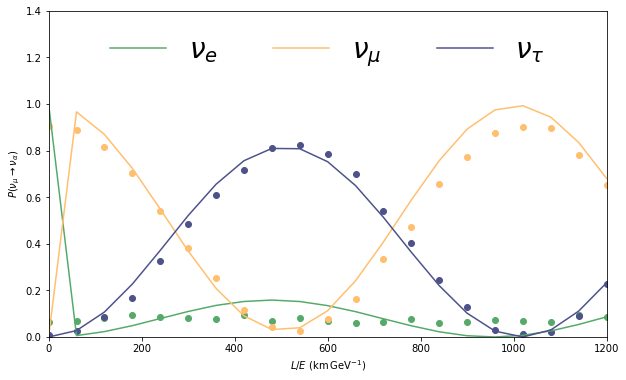

In [97]:
import matplotlib.pyplot as plt

labels = [r'$\nu_{e}$', r'$\nu_{\mu}$', r'$\nu_{\tau}$', ]
cs     = ['#56aa69',     '#ffbf6e',      '#4d528a']
qc_results = np.load('/Users/pablocastanobasurto/Desktop/Programming/qc_exploration/three_neutrino_qc.npy') # Load results from actual quantum computer
plt.figure(figsize=[10,6])
for i, (c, lab) in enumerate(zip(cs, labels)):
    plt.scatter(loee, qc_results[i], color=c)
    plt.plot(loee, sim_results[i], label=lab, color=c)
plt.legend(fontsize=28, ncol=3,loc='upper center', frameon=False)
plt.xlim(0, 1200)
plt.ylim(0, 1.4)
plt.xlabel(r'$L/E~\left(\rm{km}\,\rm{GeV}^{-1}\right)$')
plt.ylabel(r'$P\left(\nu_{\mu}\rightarrow\nu_{\alpha}\right)$')
plt.show()

Now, we have the results, and we can interpret them in the following way: each color represents one of the three neutrino flavors. Now, the straight lines are quantum simulations ran by Qiskit, which we expect to match the theory but for some slight errors. The dots are the datapoints obtained by using the IBM computer. If the actual quantum computer was error free, we would expect for the dots to lie on the straight lines at all times. However, they don't and I attribute this to errors engrained to the IBM quantum computer. Also, just to make it clear, the code on cell [91] is being ran on the IBM computer, while the one on [96] is ran by Qiskit, that's where the difference is mostly visible. That's it for the simulation! As you can see in the plot, as we travel a certain horizontal distance away from the origin, the colors change. This means that the probability to find a given flavor at a point in space changes, which is effectively what we expected from an oscillating neutrino!

With this notebook, I hope to have communicated well my thoughts on quantum computing in Parts 1 and 2, and to have inspired you with how useful quantum computing is when applied to physics scenarios in Part 3. Thank you for your attention, and I hope you have enjoyed my Physics 198 final project!